\




---




# **Datos de clientes bancarios para análisis de probabilidad de abandono**



---





# *1. Dataset elegido*

Se obtuvo el dataset en Kagle, el mismo presenta los datos de 10k clientes de un banco de Portugal, tanto clientes que abandonaron el banco como clientes que permanecen en el.


# *2. Objetivo*

El objetivo principal del analisis es identificar aspectos comunes predominantes en los clientes que abandonaron el banco, con el fin luego de poder predecir cuando un cliente habitual se encuentra próximo a abandonar el banco.

#*3. Contexto comercial*

Entidad financiera de Portugal que opera en un mercado regulado y de alta competencia. Para poder  continuar  la linea de crecimiento y ganar share de mercado es imprescindible identificar el perfil de clientes que dejan de operar y  tomar acciones para su retención.

#*4. Usuarios finales*

Los usuarios finales seran los niveles Gerenciales y Operativos, para la toma de decisiones y acciones a seguir para dar cumplimiento a los objetivos comerciales.
Esta informacion sera útil ademas para los equipos de marketing, CX y la áreas de producto qeu desarrollaran las estrategias de retención.

#*5. Data  Wrangling*
Emplearemos distintas tecnicas de Data Wrangling para preparar  el dataset y correr modelo de prediccion.


# *6. Aplicación de modelo PCA*
Aplicaremos un modelo PCA al dataset en busqueda de una reduccion de dimensionalidad.

#*7. Entrenamiento y analisis de modelos de prediccion.*
Entrenaremos 2 modelos de prediccion para el dataset elegido (Regresion Logistica y  RamndomForest), analizaremos sus resultado para concluir que modelo cumple mejor con el objetivo.

# **Importacion de librerías, carga del dataset y asignacion del mismo a una variable**

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

%cd '/content/gdrive/MyDrive/Curso_DataScience/Primer_Entrega'
DF_clientes = pd.read_csv('Bank Customer Churn Prediction.csv')

/content/gdrive/MyDrive/Curso_DataScience/Primer_Entrega


# **Visualización del dataset y su info**

**Visualizacion de una muestra del dataset para comprension de su contenido**

In [113]:
DF_clientes.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




---



In [114]:
DF_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


*Observamos 10.000 datos en total, 0 nulos y tipos de datos numericos (10) y categóricos (2)*

**Descripcion de las columnas**



* customer_id: Identificador único para cada cliente.
* credit_score: Puntaje de crédito del cliente.
* country: País donde reside el cliente.
* gender: Género del cliente.
* age: Edad del cliente.
* tenure: Número de meses que el cliente ha estado con el banco.
* balance: Saldo actual en la cuenta del cliente.
* products_number: Número de productos que el cliente tiene con el banco.
* credit_card: Si el cliente tiene una tarjeta de crédito con el banco.
* active_member: Si el cliente es un miembro activo del banco.
* estimated_salary: Salario anual estimado del cliente.
* churn: Si el cliente ha abandonado (cerrado su cuenta) con el banco.



---



#**Desarrollo del objetivo**

  Para el análisis del dataset y en búsqueda de alcanzar el objetivo, desarrollaremos las siguientes preguntas de interes:

    1. Existe un genero predominante en los clientes que permanecen/abandonan el banco?
    2. Existe una franja etaria que se distinga claramente entre los clientes que permanecen/abandonan el banco?
    3. Es el nivel de score un indicador relevante en los clientes que permanecen/abandonan el banco?
    4. Podemos identificar una franja de salarios estimados predominante en los clientes que abandonan el banco? Hay diferencias significativas segun el genero?
    5. La nacionalidad de los clientes es un factor distintivo?
    6. La cantidad de productos que poseen los clientes es un factor diferencial?
    7. Que porcentaje de clientes que abandonaron el banco eran activos?
    8. Que porcentaje de clientes que abandonaron el banco tenian tarjeta de credito?
    9. Es la antigúedad un factor determinante?

**En  primera instancia dividiremos la base de clientes según hayan abandonado el  banco o continuen  operando, almacenar estos datos en  2 variables distintas nos permitirá mas adelante comparar y entender mejor los resultados.**

In [6]:
abandono = DF_clientes.loc[DF_clientes.churn == 1]
print(f'Los clientes que abandonaron el banco son: {abandono["customer_id"].count()}')
continua = DF_clientes.loc[DF_clientes.churn == 0]
print(f'Los clientes que continuan operando con el banco son: {continua["customer_id"].count()}')

Los clientes que abandonaron el banco son: 2037
Los clientes que continuan operando con el banco son: 7963


## **1. Existe un género predominante en los clientes que permanecen/abandonan el banco?**



-----------



**Determinación de cantidad de clientes por género que abandonaron el banco**

Los clientes género femenino del banco son: 1139
Los clientes género masculino del banco son: 898


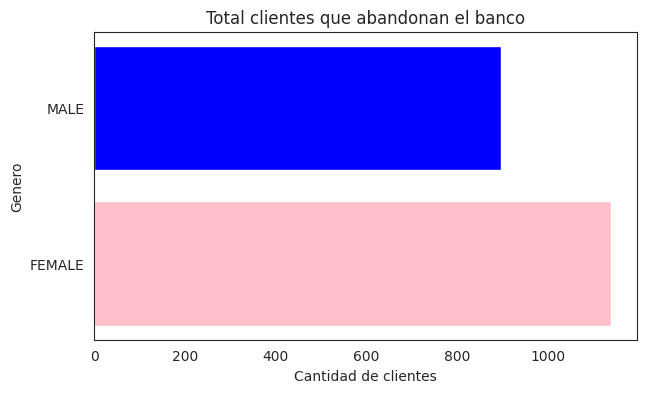

In [107]:
male_abandono = abandono.loc[abandono.gender == 'Male']
female_abandono = abandono.loc[abandono.gender == 'Female']
sum_male = male_abandono['customer_id'].count()
sum_female = female_abandono['customer_id'].count()
sum_total = sum_male + sum_female
valores = [sum_female, sum_male]

group_gender = abandono.groupby('gender').size()
print(f'Los clientes género femenino del banco son: {group_gender.Female}')
print(f'Los clientes género masculino del banco son: {group_gender.Male}')
plt.show()

#Se crea un grafico de barras lateral solo para la presentacion en PDF
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
ax.barh(labels, valores, color=['pink', 'blue'])
ax.set_xlabel('Cantidad de clientes')
ax.set_ylabel('Genero')
ax.set_title('Total clientes que abandonan el banco')
plt.show()

valores = [sum_male, sum_female]

labels = ["FEMALE", "MALE"]
values = [sum_female, sum_male]
colors = ["#007bff", "#d62728"]


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35, textinfo='label+percent', rotation=-45, marker_colors=colors)])


fig.update_layout(title="Total clientes que abandonan el banco por género")


fig.show()

*En este gráfico se puede observar que existe un mayor porcentaje de clientes de género femenino que abandonan el banco, aunque a priori no pareciera una diferencia importante, se tendra en cuenta para profundizar en el análisis siguiente.*



---



**Distribucíón de clientes que aún operan con el banco por género**

In [111]:
male = continua.loc[continua.gender == 'Male']
female = continua.loc[continua.gender == 'Female']
sum_male = male['customer_id'].count()
sum_female = female['customer_id'].count()

valores = [sum_male, sum_female]

labels = ["FEMALE", "MALE"]
values = [sum_female, sum_male]
colors = ["#d62728","#007bff"]


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35, textinfo='label+percent', rotation=-45, marker_colors=colors)])


fig.update_layout(title="Total clientes que operan con el banco por género")


fig.show()

*Podemos observar en una distribucion similar como existe un mayor porcentaje de clientes de género masculino que continuan operando con el banco.*


-----

**Como conclusión de este análisis inicial por género podemos observar que ambos gráficos indican que el banco pareciera ser mas elegible para clientes del género masculino, se recomienda ahondar en hábitos de consumo y preferencias de los clientes género femenino con el fin de enteder porque la propuesta del banco no resulta tan atractiva.**

---


##**2. Existe una franja etaria que se distinga claramente entre los clientes que permanecen/abandonan el banco?**

---

**Grafiquemos la distribución de la totalidad de los clientes por edad y género**

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Cantidad')]

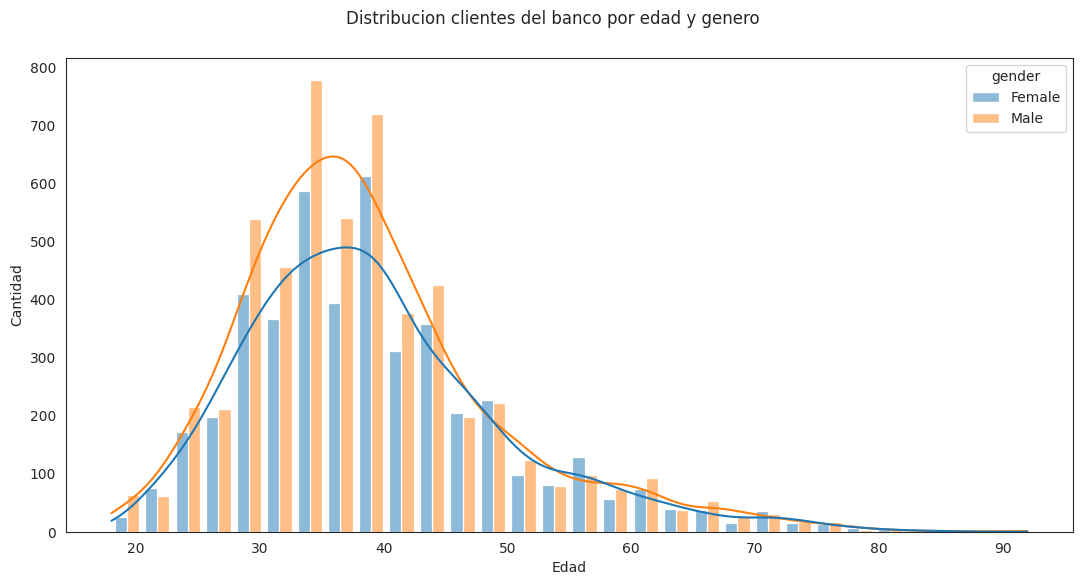

In [102]:
plt.figure(figsize=(13, 6))
ax=sns.histplot(data=DF_clientes, x='age', hue='gender', bins= 30, multiple='dodge', kde='True', shrink=.8)
fig = ax.get_figure()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Distribucion clientes del banco por edad y genero")
ax.set(xlabel='Edad', ylabel ="Cantidad")



---



**Ahora veamos la misma distribución pero para los clientes que abandonaron el banco**

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Cantidad')]

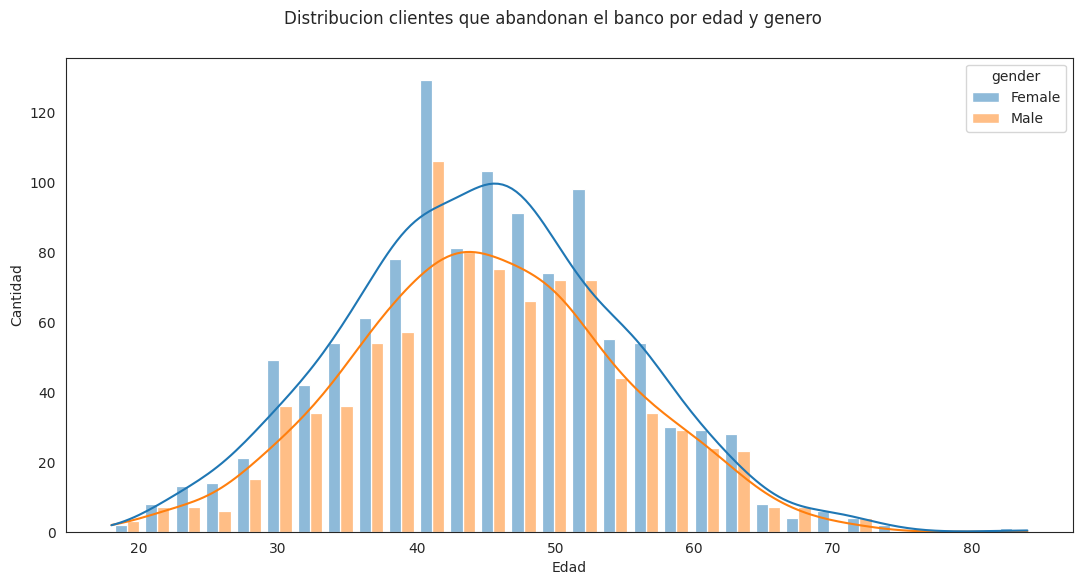

In [101]:
plt.figure(figsize=(13, 6))
ax=sns.histplot(data=abandono, x='age', hue='gender', bins= 30, multiple='dodge', kde='True', shrink=.8)
fig = ax.get_figure()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Distribucion clientes que abandonan el banco por edad y genero")
ax.set(xlabel='Edad', ylabel ="Cantidad")

---

**Por último veamos la distribución para clientes que continuan operando**

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Cantidad')]

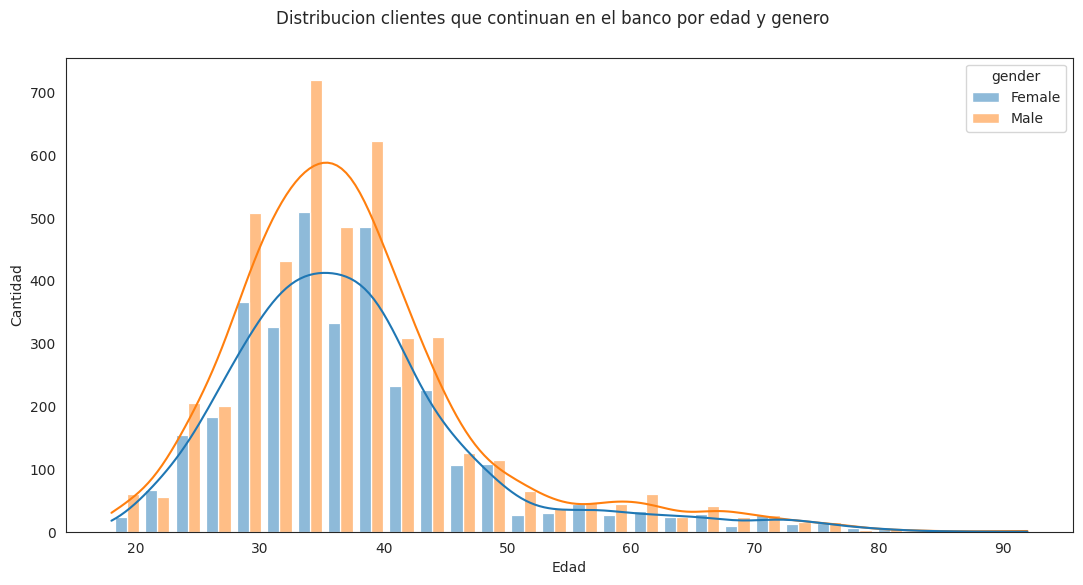

In [100]:
plt.figure(figsize=(13, 6))
ax=sns.histplot(data=continua, x='age', hue='gender', bins= 30, multiple='dodge', kde='True', shrink=.8)
fig = ax.get_figure()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Distribucion clientes que continuan en el banco por edad y genero")
ax.set(xlabel='Edad', ylabel ="Cantidad")

---

*Se puede observar como el gráfico de TODOS los clientes y el de clientes que continuan operando presentan distribuciones similares. En cambio el que representa a los cliente que abandonaron el banco, presenta el mayor volumen en una franja etaria mas avanzado. No se observan diferencias significativas por género,  mas alla de las esperables por la cantidad diferente de clientes que ya se habia observado.
Dadas estas visualizacion, recomendamos acciones de marketing o mediciones de satisfaccion de cliente que incluyan como dato la edad para entender mas en profundidad la experiencia del clientes en la franja etaria 40/50.*

___

##**3. Es el nivel de score un indicador relevante en los clientes que permanecen/abandonan el banco?**

---

**Veamos como se distribuyen los clientes según el nivel de score, segmentado además por clientes que continúan operando vs clientes que abandonaron el banco**

In [99]:
data_0 = DF_clientes[DF_clientes["churn"] == 0]["credit_score"]
data_1 = DF_clientes[DF_clientes["churn"] == 1]["credit_score"]

trace0 = go.Histogram(
    x=data_0,
    name="No abandonaron",
    marker_color="#007bff",
    opacity=0.7,
)

trace1 = go.Histogram(
    x=data_1,
    name="Abandonaron",
    marker_color="#d62728",
    opacity=0.7,
)

layout = go.Layout(
    title="Distribución cantidad de clientes por nivel de score",
    xaxis_title="Score de crédito",
    yaxis_title="Cantidad de clientes",
)

fig = make_subplots(rows=1, cols=2, subplot_titles=("No abandonaron", "Abandonaron"))

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)

fig.update_layout(
    showlegend=False,
    width=900,
    height=400,
    margin=dict(t=50, r=20, l=100, b=30),
)
fig.show()

*Se observan distribuciones normales en ambos casos, sin diferencias relevantes.*

---

##**4. Podemos identificar una franja de salarios estimados predominante en los clientes que abandonan el banco? Hay diferencias significativas segun el genero?**

---

**Observemos en los clientes que abandonaron el banco si identificamos algún nivel de salario predominante segmentado además por género**

[Text(0.5, 0, 'Salario estimado'), Text(0, 0.5, 'Cantidad')]

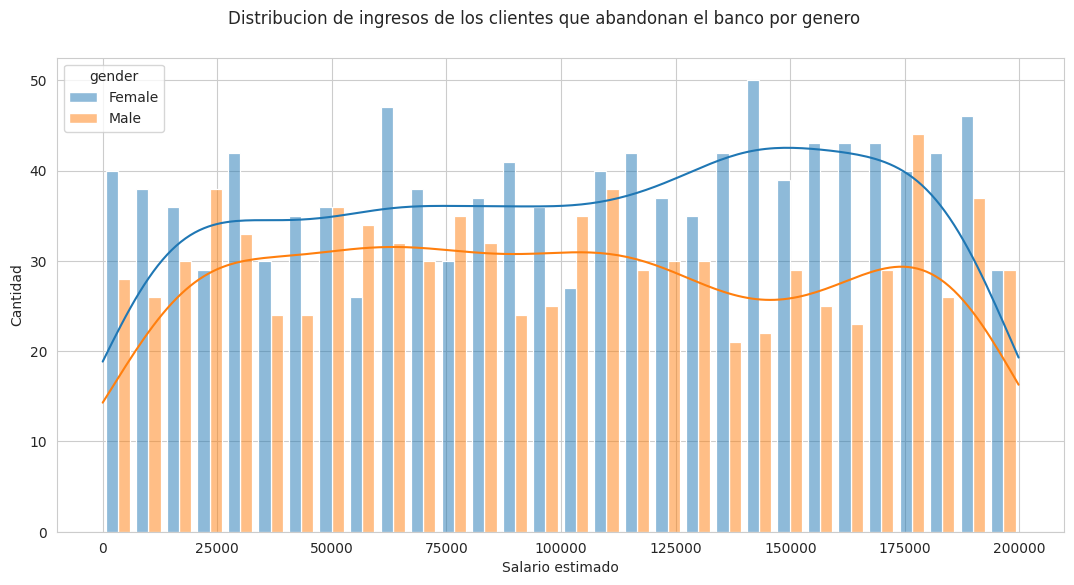

In [90]:
plt.figure(figsize=(13, 6))
ax=sns.histplot(data=abandono, x='estimated_salary', hue='gender', bins= 30, multiple='dodge', kde='False', shrink=.8)
fig = ax.get_figure()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Distribucion de ingresos de los clientes que abandonan el banco por genero")
ax.set(xlabel='Salario estimado', ylabel ="Cantidad")




---



**Determinación de salarios promedio por género en clientes que abandonaron el banco**

In [86]:
female=abandono.loc[abandono.gender=='Female']
female_sal=female['estimated_salary'].mean().round(2)
male=abandono.loc[abandono.gender=='Male']
male_sal=male['estimated_salary'].mean().round(2)
print(f'El salario promedio para clientes genero femenino es: {female_sal}')

print(f'El salario promedio para clientes genero masculino es: {male_sal}')

El salario promedio para clientes genero femenino es: 102948.99
El salario promedio para clientes genero masculino es: 99584.29


*Se observa que no existen diferencias significativas en la media de salarios percibido por género.*

---

**Podemos ver en el grafico, que aunque en el promedio de los salarios no presenta una diferencia significativa, a partir de un ingreso estimado de alrededor de 130.000, en el caso de las mujeres  aumenta la densidad de clientes que abandonan el banco, pero sin embargo la curva se comporta de manera inversa para los hombres. La curva tiende a comportarse nuevamente de manera similar alrededor de los 175.000 de ingreso estimado**

---

##**5. La nacionalidad de los clientes es un factor distintivo?**

**Veamos si el país de origen de los clientes es un factor diferencial**

In [85]:
client_pais = abandono.groupby('country')['customer_id'].count()

df = pd.DataFrame({
    "Paises": client_pais.index,
    "customer_count": client_pais.values,
})


fig = px.bar(df, x="customer_count", y="Paises", color="Paises", title="Distribución de clientes que abandonan el banco por país")


fig.update_layout(
    title="Distribución de clientes que abandonan el banco por país",
    xaxis_title="Número de clientes",
    yaxis_title="País",
)

fig.show()

**Se observa en este grafico como existe una clara preponderancia de Francia y Alemania por sobre España, duplicando en ambos casos la cantidad de clientes que abandonan el banco. Recomendamos analizar mas en profundidad la experiencai de cliente para aquellos de las nacionalidades Francia/Alemania, para entender que dificultades estan encontrando al operar con el banco que decanta en la baja de sus producto(barrera de idioma¿?).**

---

##**6. La cantidad de productos que poseen los clientes es un factor diferencial?**

**Observemos si la cantidad de productos que tenian los clientes que abandonaron el banco es un informacion relavante.**

In [78]:
cant_prod = abandono.groupby('products_number')['customer_id'].count()

df = pd.DataFrame({
    "Productos": cant_prod.index,
    "customer_count": cant_prod.values,
})

fig = px.bar(df, x="Productos", y="customer_count", color="Productos", color_discrete_map=px.colors.qualitative.Set2)


fig.update_layout(
    title="Clientes que abandonaron segun cantidad de productos",
    xaxis_title="Cantidad de productos",
    yaxis_title="Cantidad  de clientes",
)


fig.show()

*Se observa claramente como la  mayor cantidad de los clientes que abandonaron el banco poseían solamente un producto, acciones de crosseling podrían ser importantes para aumentar la identificación del cliente con el banco y anclarlo por mas tiempo.*

---

##**7. Que porcentaje de clientes que abandonaron el banco eran activos?**


**Es importante determinar si los clientes que abandonaron el banco eran activos al momento de hacerlo o no, veamoslo en un gráfico**

In [59]:
activos = abandono.loc[abandono.active_member == 1]
no_activo = abandono.loc[abandono.active_member == 0]
sum_activos = activos['customer_id'].count()
sum_no_activo = no_activo['customer_id'].count()


valores = [sum_activos, sum_no_activo]

labels = ["ACTIVOS", "NO ACTIVOS"]
values = [sum_activos, sum_no_activo]
colors = ["#007bff", "#d62728"]


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35, textinfo='label+percent', rotation=-45, marker_colors=colors)])


fig.update_layout(title="Distribucion de clientes que abandonaron según esten activos o no")


fig.show()

*Se observa como el mayor porcentaje de clientes que abandonaron el banco no estaban activos, esto podria ser un indicador a futuro en caso que un cliente pase de activo a no activo. Se recomiendan ademas acciones de marketing dirigidas a activar el uso de productos por parte de los clientes(promociones/descuentos especificos por la primera utilizacion de sus productos o contratacion de uno nuevo).*

---

##**8. Que porcentaje de clientes que abandonaron el banco tenian tarjeta de credito?**


**Siendo la tarjeta de crédtio un producto fundamental y puerta de entrada de los clientes a la entidad, observemos cuantos clientes poseían este producto al momento de abandonar el banco.**

In [24]:
tieneTc = abandono.loc[abandono.credit_card == 1]
noTieneTc= abandono.loc[abandono.credit_card == 0]
sum_tiene = tieneTc['customer_id'].count()
sum_noTiene = noTieneTc['customer_id'].count()
valores = [sum_tiene, sum_noTiene]

labels = ["TIENE TC", "NO TIENE TC"]
values = [sum_tiene, sum_noTiene]
colors = ["#007bff", "#d62728"]


fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35, textinfo='label+percent', rotation=-45, marker_colors=colors)])


fig.update_layout(title="Tenencia de tarjetas de credito en clientes que abandonaron el banco")


fig.show()

*Predomina ampliamente la cantidad de clientes que si tenian tarjeta de crédito al momento de abandonar el banco. Seria importante monitorear para este producto en particular sus diferentes drivers (servicio, limites, respuesta, reclamos, descuentos), dado que alguna falencia en este producto podria ser un desencadenante en la decision de abandono del banco*

---

##**9. Es la antigúedad un factor determinante?**

**Veamos la distribución de los clientes según su antigüedad, segmentado ademas por género y según operen o hayan abandonado el banco.**

In [112]:
fig = px.histogram(DF_clientes, x="tenure", color="gender", nbins=30, barmode="stack",facet_col="churn", color_discrete_map={"Male": "#007bff", "Female": "#d62728"})
fig.update_layout(
    title="Distribución cantidad de clientes por antigúedad",
    xaxis_title="Antigüedad  (años)",
    yaxis_title="Cantidad de clientes",
)
fig.show()

*Observamos en estos gráficos como la antigúedad no pareciera ser un factor determinante, tanto en el grupo de clientes que continuan en el banco como en el de clientes que abandonaron el banco, las cantidades no varian significativamente, lo que indicaria que la experiencia del cliente dentro del banco es similar durante todo el periodo de vida dentro del banco.*

--------------------------------

#**Principales Insights y Recomendaciones**

**De la observacion del análisis de los datos y las graficas podemos identificar los siguientes Insights:**


*   El banco pareciera tener una oferta de  productos que resulta mas atractiva  para clientes de género masculino y edad no superior a los 40 años.
*   La nacionalidad se visualiza como un factor determintante,  duplicando Francia y Alemania en ambos casos a los clientes que abandonaron el banco de nacionalidad Española.
*   La enorme mayoria de los clientes que abandonan el banco son  monoproducto, siendo este producto ademas una tarjeta de credito.
*   Los clientes que abandonan el banco son fundamentalmente clientes no activos.

**Recomendaciones:**


*   Explorar hábitos de consumo y preferencias de clientes de género femenino y franja etaria entre  40 y  55 años, para poder conformar una propuesta de  servicios y  beneficios que les resulte mas interesante.
*   Identificar si el idioma constituye una barrera para operar con el banco, tratar con los equipos de CX si es posible eliminar esta barrera mediante una traduccion de las diferentes interfaces con las que operan los clientes.
*   Realizar campañas de crossel  y activación de productos dirigidas para conseguir un mejor ratio de utilización  de productos.

---

#**Data Wrangling**

## **Principales indices estadisticos**

---



*En esta líneas podemos observar los principales índices estadisticos, es importante destacar que varias columnas del dataset poseen datos binarios (ej. churn, credit_card, active_meber).*

In [25]:
DF_clientes.describe()


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Verifiquemos si encontramos duplicados en el dataset**

In [26]:
print(DF_clientes.duplicated())
print(f'La cantidad de duplicados es: {DF_clientes.duplicated().sum()}')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
La cantidad de duplicados es: 0


---

**Veamos si encontramos valores nulos**

In [27]:
print(f'La cantidad de datos nulos es:\n{DF_clientes.isnull().sum()}')

La cantidad de datos nulos es:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


---

##**Búsqueda de outliers**

**Realizaremos a continuación la busqueda de Outliers en el DATASET que puedan afectar al modelo y su predicción**

In [28]:
#Seleccionamos las columnas donde su contenido podria presentar outliers
data=DF_clientes[['credit_score','age','estimated_salary','balance']]
data.head()

,credit_score,age,estimated_salary,balance
0,619,42,101348.88,0.00
1,608,41,112542.58,83807.86
2,502,42,113931.57,159660.80
3,699,39,93826.63,0.00
4,850,43,79084.10,125510.82


**Realizamos para cada columna un boxplot y detectamos que las columnas de AGE y CREDIT_SCORE son las que presentan Outliers, no asi las de ESTIMATED_SALARY y BALANCE**

<ipython-input-29-be8faf2eef4c>:2: UserWarning:

When passing multiple axes, layout keyword is ignored.



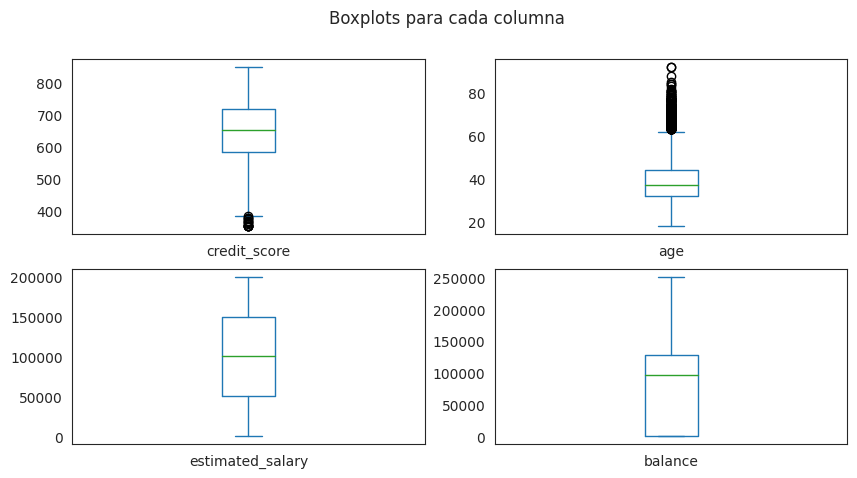

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
data.plot(kind='box', subplots=True, layout=(2, 2), ax=axes, sharex=False, sharey=False)
plt.suptitle('Boxplots para cada columna')
plt.show()

**Creamos la función para identificar y almancenar los outliers en una lista, realizamos este proceso para ambas columnas**

In [30]:
anomalies= []

def find_anomalies(data):
  data_std = data.std()
  data_mean= data.mean()
  anomaly_cut_off = data_std*2
  lower_limit = data_mean - anomaly_cut_off
  upper_limit = data_mean + anomaly_cut_off
  print(f'El limite inferior es: {lower_limit[0]}')
  print(f'El limite superior es: {upper_limit[0]}')

  for index, row in data.iterrows():
    outlier = row
    #print(outlier)
    if (outlier.iloc[0]) > upper_limit.iloc[0] or (outlier.iloc[0]) < lower_limit.iloc[0]:
      anomalies.append(index)
  return print(f'La cantidad de outliers son: {len(anomalies)}')


find_anomalies(data[['credit_score']])



El limite inferior es: 457.22220252773934
El limite superior es: 843.8353974722608
La cantidad de outliers son: 500


**Ubiquemos solo los datos de score mas bajo, ya que el gráfico no identificaba a los de score por encima del limite superior como Outliers en la columna CREDIT_SCORE**

In [31]:
out_min = data[data['credit_score']< 457]
print(out_min)

      credit_score  age  estimated_salary    balance
7              376   29         119346.88  115046.74
29             411   29          53483.21   59697.17
79             416   41          98301.61  122189.66
99             413   34           6534.18       0.00
125            432   42         110265.24  152603.45
...            ...  ...               ...        ...
9624           350   40         172321.21  111098.85
9644           452   35         149614.81       0.00
9765           445   64          43678.06  136770.67
9785           455   27          70774.97  155879.09
9930           425   40         172646.88  166776.60

[223 rows x 4 columns]


*Identificamos 223 clientes con score menor a 457*

---

**Función para ubicar y almacenar Outliers en la columna AGE**

In [32]:
anomalies_age= []

def find_anomalies_age(data):
  data_std = data.std()
  data_mean= data.mean()
  anomaly_cut_off = data_std*2
  lower_limit = data_mean - anomaly_cut_off
  upper_limit = data_mean + anomaly_cut_off
  print(f'El limite inferior es: {lower_limit[0].round()}')
  print(f'El limite superior es: {upper_limit[0].round()}')

  for index, row in data.iterrows():
    outlier = row
    #print(outlier)
    if (outlier.iloc[0]) > upper_limit.iloc[0] or (outlier.iloc[0]) < lower_limit.iloc[0]:
      anomalies_age.append(index)
  return print(f'La cantidad de outliers son: {len(anomalies_age)}')


find_anomalies_age(data[['age']])

El limite inferior es: 18.0
El limite superior es: 60.0
La cantidad de outliers son: 526


**Ubiquemos los datos de clientes mayores de 60 años, que son los identificados como outliers en el boxplot**

In [33]:
out_max_age=data[data['age']>60]
print(out_max_age)


      credit_score  age  estimated_salary    balance
42             556   61          94153.83  117419.35
44             660   61         158338.39  155931.11
58             511   66           1643.11       0.00
85             652   75         114675.75       0.00
104            670   65         177655.68       0.00
...            ...  ...               ...        ...
9832           595   64          89935.73  105736.32
9879           486   62         168034.83  118356.89
9894           521   77          49054.10       0.00
9897           678   61         159938.82       0.00
9936           609   77          18708.76       0.00

[464 rows x 4 columns]


*Identificamos 464 clientes mayores de 60 años*

---

##**Preparando el dataset para el modelo de regresión logistica, con técnicas de one hot encoding**

---

**En primera instancia reemplazaremos las variables categóricas con OHE**

In [34]:
df = DF_clientes.copy()
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[['country', 'gender']])
encoded_cols = pd.DataFrame(encoder.transform(df[['country', 'gender']]).toarray())
encoded_cols.columns = encoder.get_feature_names_out(['country', 'gender'])
df.drop(columns=['country', 'gender'], inplace=True)
df = pd.concat([df, encoded_cols], axis=1)
print(df.head())
df.info()

   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_France  \
0            1              1         101348.88      1             1.0   
1            0              1         112542.58      0             0.0   
2            1              0         113931.57      1             1.0   
3            0              0          93826.63      0             1.0   
4            1              1          79084.10      0             0.0   

   country_Germany  country_Spain  gender_Female  gender_Male  
0              0.0            0.0            1.0    

**Veamos por último si en esta matriz de relación encontramos relaciones entre variables.**

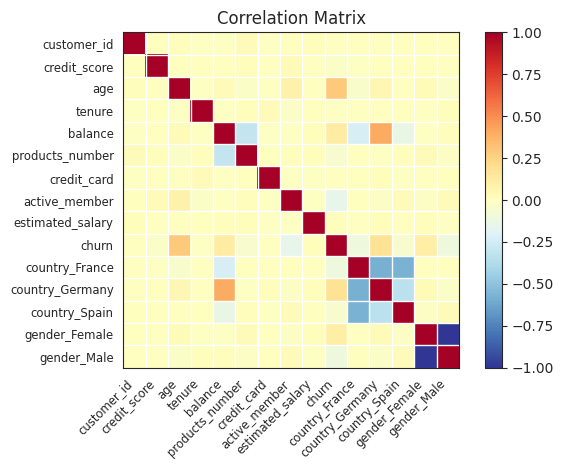

In [35]:
corr=df.corr()
sm.graphics.plot_corr(corr, xnames=(list(corr.columns)))
plt.show()

**Podemos observar que no se encuentran relaciones directas entre las variables.**

---

#**Aplicacion modelo PCA**

**Verifiquemos ahora mediante el modelo PCA si existe oportunidad de realizar una reduccion de dimensionalidad que optimize el procesamiento sin una perdida importante de porcentaje de varianza**

Porcentaje de varianza explicada por cada componente
[1.54433444e-01 1.43410868e-01 1.15675281e-01 8.56645438e-02
 8.33772329e-02 7.80563286e-02 7.69525526e-02 7.66741092e-02
 7.47277421e-02 6.92581323e-02 4.17697656e-02 1.11121936e-32
 3.64401251e-33]


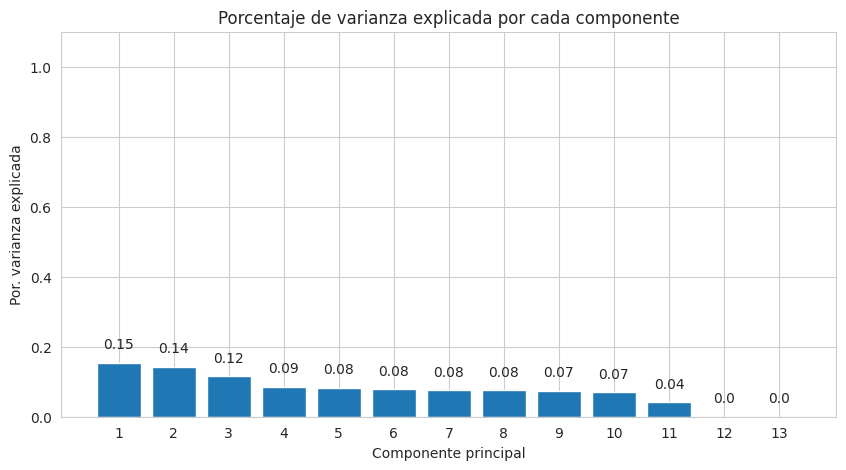

In [37]:
df_pca=df.drop(['customer_id', 'churn'], axis=1)
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_pca)
# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns;sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(df_pca.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

**En este caso vemos que en lineas generales hay un peso similar en el porcentaje de cada componente, solo los 2 ultimos (que corresponden al genero), se podrian dejar de considerar, pero dado que no estamos encontrando problemas de rendimiento o procesamiento y la optimización seria imperceptible, se decidio continuar con el dataset completo.**

---

#**Entrenamiento y analisis de modelos de prediccion**

##**Modelo de regresión logistica**

**Comenzamos a entrenar el modelo, lo haremos en principio con la totalidad de los datos.**

In [38]:
X = df.drop(['customer_id', 'churn'], axis=1).reset_index(drop=True)
y = df['churn']
# Separacion train/tet
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=15000, n_jobs=-1)
# Ajustar modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=15000, n_jobs=-1)

**Verificamos ahora la matriz de confusion y accuracy del modelo**

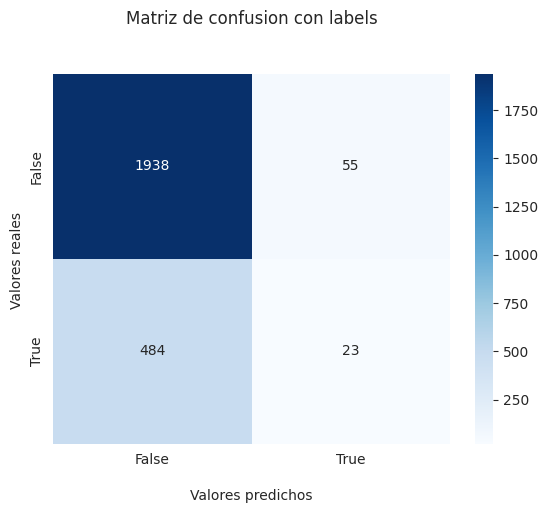

Accuracy: 0.7844


In [41]:
#Predicciones
predicciones = model.predict(X_test)
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, annot_kws = {'size': 10}, cmap='Blues', fmt='g')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
accuracy=accuracy_score(y_test, predicciones)
print(f"Accuracy: {accuracy}")

**El modelo presenta un accuracy del 79%, sobre la muestra total de testeo, se verifica es mas preciso prediciendo que clientes continuaran operando con el banco que identificando a aquellos que se dieron de baja.**

---

**Realicemos nuevamente el entrenamiento del modelo filtrando el dataset de los outliers identificados**

In [42]:
df_filtered = df[df['credit_score'] >= 457]
df_filtered_2 = df_filtered[df_filtered['age'] < 60]
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9268 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9268 non-null   int64  
 1   credit_score      9268 non-null   int64  
 2   age               9268 non-null   int64  
 3   tenure            9268 non-null   int64  
 4   balance           9268 non-null   float64
 5   products_number   9268 non-null   int64  
 6   credit_card       9268 non-null   int64  
 7   active_member     9268 non-null   int64  
 8   estimated_salary  9268 non-null   float64
 9   churn             9268 non-null   int64  
 10  country_France    9268 non-null   float64
 11  country_Germany   9268 non-null   float64
 12  country_Spain     9268 non-null   float64
 13  gender_Female     9268 non-null   float64
 14  gender_Male       9268 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 1.1 MB


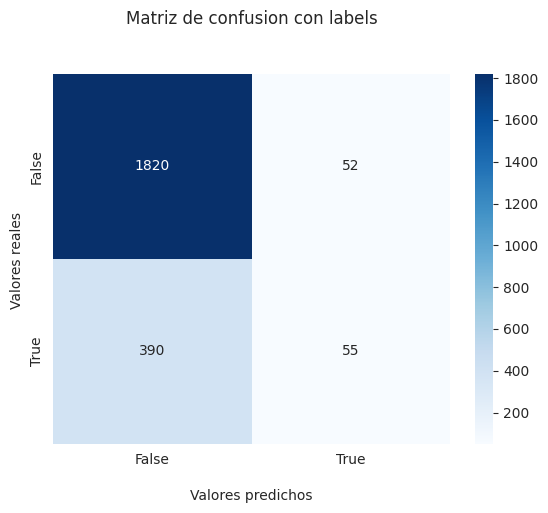

Accuracy: 0.8092360811394044


In [43]:
X = df_filtered_2.drop(['customer_id', 'churn'], axis=1).reset_index(drop=True)
y = df_filtered_2['churn']
# Separacion train/tet
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=15000, n_jobs=-1)
# Ajustar modelo
model.fit(X_train, y_train)
#Predicciones
predicciones = model.predict(X_test)
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
ax = sns.heatmap(cf_matrix, annot=True, annot_kws = {'size': 10}, cmap='Blues', fmt='g')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
accuracy=accuracy_score(y_test, predicciones)
print(f"Accuracy: {accuracy}")

**Vemos como se consigue aumentar el accuracy por encima del 80%, aunque de todas maneras continua mostrando una cantidad de alta de casos en los que no predice correctamente que clientes se daran de baja.**

---

**Veamos el reporte de clasificación de nuestro modelo**

In [44]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1872
           1       0.51      0.12      0.20       445

    accuracy                           0.81      2317
   macro avg       0.67      0.55      0.55      2317
weighted avg       0.76      0.81      0.76      2317



**Podemos confirmar con este reporte que el modelo funciona correctamente para identificar a los clientes que continuaran operando con el banco, pero falla al momento de identificar a aquellos que se daran de baja (bajos valores de precision, recall y f1-score).**

---

##**Modelo Random Forest**

In [50]:
X = df_filtered_2.drop(['customer_id', 'churn', 'gender_Female','gender_Male'], axis=1).reset_index(drop=True)
y = df_filtered_2['churn']
# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Prediccciones
predicciones = model_rf.predict(X_test)
print(f'El accuracy del modelo es: {metrics.accuracy_score(y_test, predicciones)}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



El accuracy del modelo es: 0.86965904186448


**Observamos que el accuracy del modelo RandomForest supero al modelo de Regresion Logistica, cercano al 87% es un excelente valor.**

---

**Veamos el reporte para este modelo**

In [51]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1883
           1       0.85      0.37      0.51       434

    accuracy                           0.87      2317
   macro avg       0.86      0.68      0.72      2317
weighted avg       0.87      0.87      0.85      2317



**La mejora observada en el reporte es sustancial, la clase 0 logra mantener sus valores de precision, recall y f1, y para la clase 1, donde el modelo de regresion logistica mostraba los mayores inconvienientes, la medicion duplica o triplica los resultados**

---

**Observemos por último la matriz de confusión para este modelo**

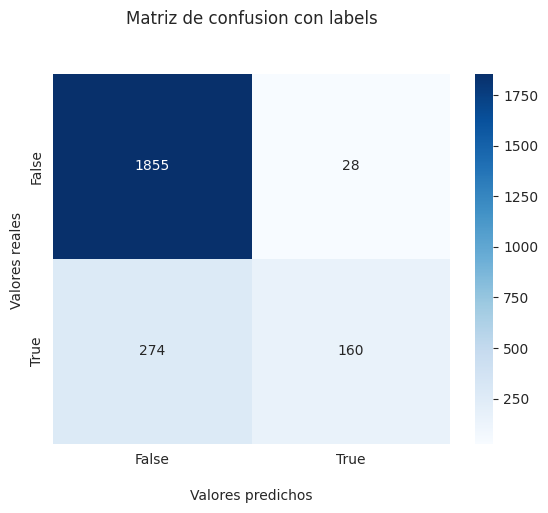

In [52]:
cf_matrix = confusion_matrix(y_test, predicciones)
ax = sns.heatmap(cf_matrix, annot=True, annot_kws = {'size': 10}, cmap='Blues', fmt='g')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

**Observamos en la matriz una importante mejora en la deteccion de TP, esta mejora es alentadora de cara al desarrollo del proyecto, pero entendemos no alcanza  para considerarlo sólido. Probablemente se deba a una baja cantidad de datos. Se recomienda la obtención de mayor cantidad de datos de clientes que hayan abandonado el banco.**

# *Anexo I Descarga de datos desde APIS Publicas*


En este apartado  nos conectaremos  a una API publica y descargaremos un dataset para ver sus principales caracteristicas.

In [ ]:
#Importamos las librerias que vamos a utilizar
import requests
import pandas as pd

*Nos conectamos a la URL, verificamos la conexion y cargamos el CSV*

In [ ]:
url= 'https://apis.datos.gob.ar/series/api/series/?ids=tmi_arg&format=csv'
df= requests.get(url)
print(df)
with open('data.csv', 'w') as f:
    f.write(df.text)
data=pd.read_csv('data.csv')

<Response [200]>


*Damos una primera vista a los datos y creamos el DataFrame*

In [ ]:
datos=pd.DataFrame(data)

In [ ]:
datos.head()

,indice_tiempo,mortalidad_infantil_argentina
0,1990-01-01,25.6
1,1991-01-01,24.7
2,1992-01-01,23.9
3,1993-01-01,22.9
4,1994-01-01,22.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   indice_tiempo                  33 non-null     object 
 1   mortalidad_infantil_argentina  33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


*Generamos un grafico para ver la evolucion en el tiempo del indice de mortalidad infantil*

In [ ]:
datos.describe()

,mortalidad_infantil_argentina
count,33.000000
mean,14.848485
std,5.377913
min,8.000000
25%,10.600000
50%,13.300000
75%,18.800000
max,25.600000


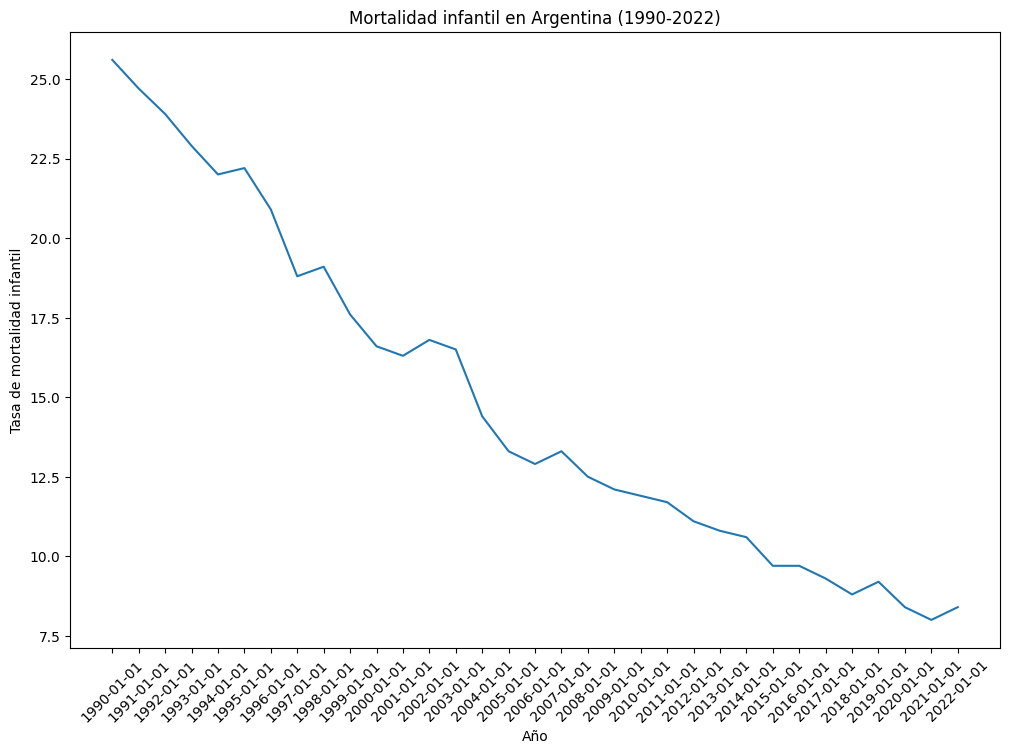

In [ ]:
#Creamos un gráfico de lineas que nos muestre la evolucion del indice a traves del  tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos, x='indice_tiempo', y='mortalidad_infantil_argentina')

# Agregamos las etiquetas y modificamos la orientacion de las fechas
plt.title('Mortalidad infantil en Argentina (1990-2022)')
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad infantil')
plt.xticks(rotation=45)

# Mostramos el grafico
plt.show()


**Conclusion**

*Del gráfico se desprende un clara tendencia a la baja en el indice de mortalidad infantil. Dado que existen  multiples factores que inciden en esta variable(pobreza, salud, educacion, infraestructura, etc), seria interesante observar la evolucion de estas variables tambien para entender que grado de correlacion existe.*